In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/2020_4학년_2학기/캡스톤디자인/datasets_Placement_Data.csv",encoding='cp949')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


sl_no = Serial Number(일련번호)   
ssc_p = Secondary Education(중등학교) percentage - 10th Grade   
ssc_b = Board of Education-Central/Others    
hsc_p = Higher Secondary Education(고등학교) percentage-12th Grade   
hsc_b = Board of Education-Central/Others   
hsc_s = Specialization in Higher Secondary Education   
degree_p = Degree Percentage   
degree_t = Under Graduation(Degree type)-Field of degree education   
etest_p = Employability test percentage(conducted by college)   
          취업능력시험비율(대학에 의해 실시된)    
mab_p = MBA percentage(경영학 석사 비율)    

대학에서 50%이상의 점수는 훌륭한 성적이다.    

인도는 초등학교 5년, 중학교 5년, 고등학교2년, 대학교 3년의 과정.   
10학년까지 공립학교를 무상으로 보내주고 있음.    
여성들의 취학률이 남성들보다 낮음.   
그래서 여성은 초등학교부터 고등학교 12년 과정을 무상으로 교육받을 수 있도록 하는 제도를 채택중.
인도는 학교마다 서로 다른 교육제도로 운영하고 있음.   
CBSE(Central Board of Secondary Education) = 대부분 공립학교에서 채택하고 있는제도.   
수업은 영어로 진행되고 힌디어를 필수적으로 배워야 함.    
ICSE(Indian Certificate of Secondary Education) = 영국식 시스템이 합쳐진 교육제도.    
대학1학년 수준과 비슷하여 학구열 높은 학생들이 대부분 이 교육제도를 채택한 학교를 감.    


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


범주형 형태인 데이터 = gender, ssc_b, hsc_b,hsc_s, degree_t, workex, specialisation, status

In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


▲ 보면 연속형만 표현하는 듯 ?

In [6]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [7]:
display(data['gender'].value_counts())

M    139
F     76
Name: gender, dtype: int64

In [8]:
display(data['status'].value_counts())

Placed        148
Not Placed     67
Name: status, dtype: int64

In [9]:
print("연봉 데이터 없는 사람 수 :",len(data[data['salary'].isnull()]))

연봉 데이터 없는 사람 수 : 67


In [10]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
#한글 깨질 때
import matplotlib
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)

matplotlib.rcParams['axes.unicode_minus']=False

<AxesSubplot:>

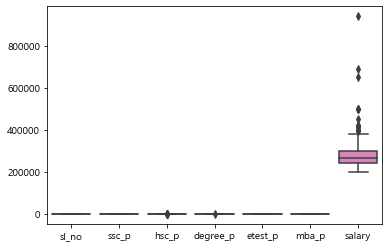

In [12]:
sns.boxplot(data=data)

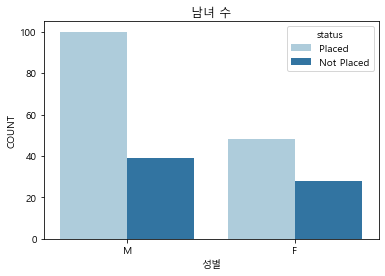

In [13]:
sns.countplot("gender",hue = "status", palette = 'Paired',data=data)
plt.title("남녀 수")
plt.xlabel("성별")
plt.ylabel("COUNT")
plt.show()
# sns.barplot은 seaborn 시각화 패키지

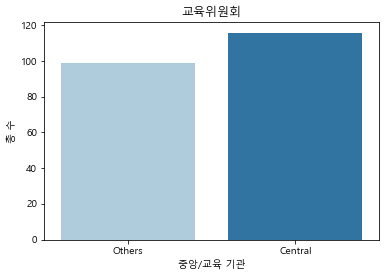

In [14]:
sns.countplot("ssc_b",palette = "Paired",data=data)
plt.title("교육위원회")
plt.xlabel("중앙/교육 기관")
plt.ylabel("총 수")
plt.show()

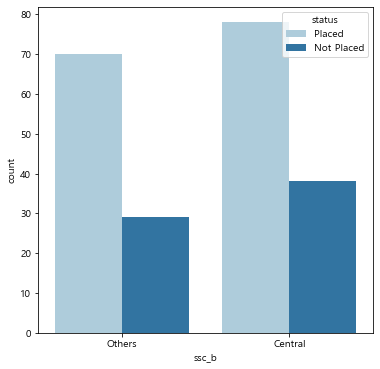

In [15]:
ax = sns.countplot("ssc_b",hue="status",palette = "Paired",data = data)
ax.figure.set_size_inches(6,6)
plt.show()

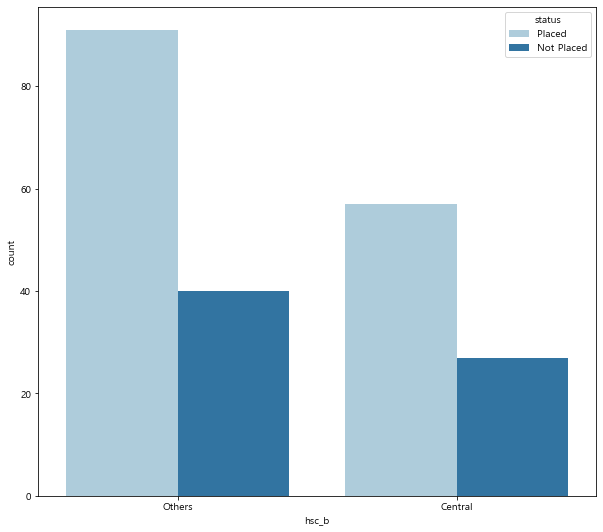

In [16]:
ax = sns.countplot("hsc_b",hue="status",palette = "Paired",data = data)
ax.figure.set_size_inches(10,9)
plt.show()

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

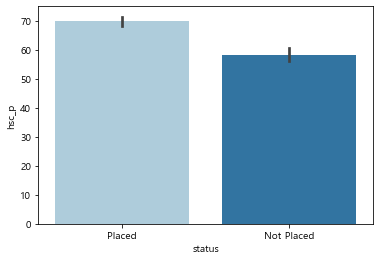

In [17]:
sns.barplot(x = "status",y="hsc_p",palette = "Paired",data = data)

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

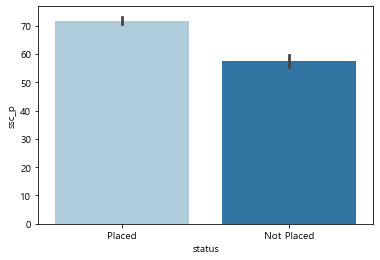

In [18]:
sns.barplot(x='status',y='ssc_p', palette = 'Paired',data = data)

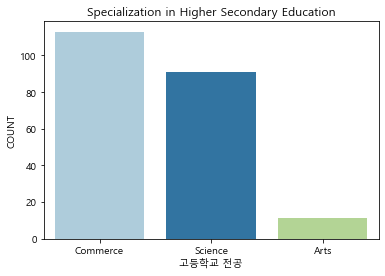

In [19]:
sns.countplot("hsc_s", palette = 'Paired',data=data)
plt.title("Specialization in Higher Secondary Education")
plt.xlabel("고등학교 전공")
plt.ylabel("COUNT")
plt.show()

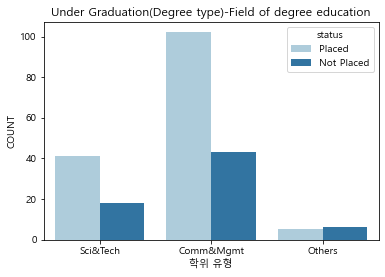

In [20]:
sns.countplot("degree_t", hue ='status',palette = 'Paired',data=data)
plt.title("Under Graduation(Degree type)-Field of degree education")
plt.xlabel("학위 유형")
plt.ylabel("COUNT")
plt.show()

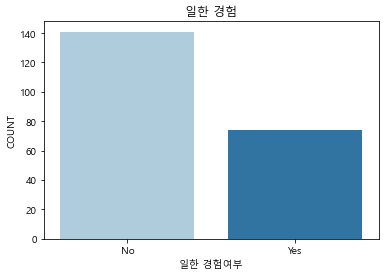

In [21]:
sns.countplot("workex", palette = 'Paired',data=data)
plt.title("일한 경험")
plt.xlabel("일한 경험여부")
plt.ylabel("COUNT")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


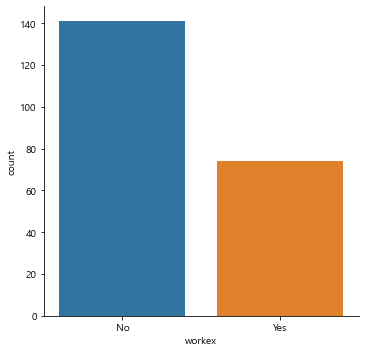

In [22]:
g = sns.factorplot('workex',data = data, kind = 'count',size = 5)
g.set_xlabels()

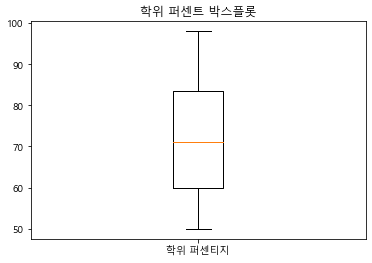

In [23]:
plt.boxplot(data['etest_p'],sym='bo')
plt.title('학위 퍼센트 박스플롯')
plt.xticks([1],['학위 퍼센티지'])
plt.show()

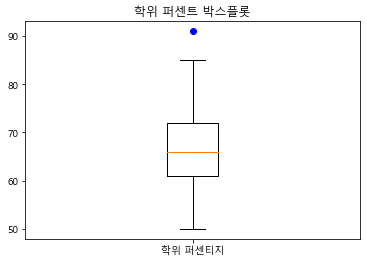

In [24]:
plt.boxplot(data['degree_p'],sym='bo')
plt.title('학위 퍼센트 박스플롯')
plt.xticks([1],['학위 퍼센티지'])
plt.show()

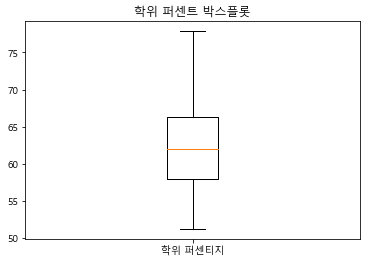

In [25]:
plt.boxplot(data['mba_p'],sym='bo')
plt.title('학위 퍼센트 박스플롯')
plt.xticks([1],['학위 퍼센티지'])
plt.show()

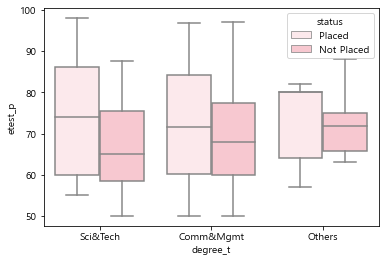

In [26]:
sns.boxplot(x='degree_t',y='etest_p',hue='status', color = 'pink',data=data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


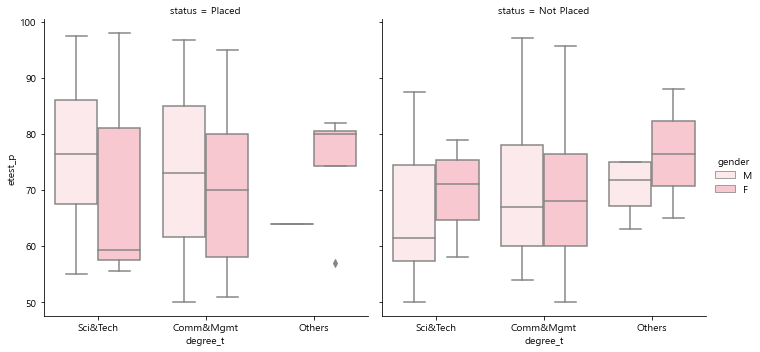

In [27]:
sns.factorplot(x="degree_t", y="etest_p", hue="gender", col="status", data=data, color = 'pink', kind="box")
plt.show()

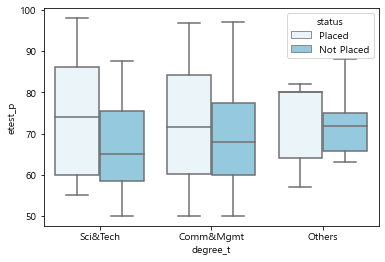

In [28]:
sns.boxplot(x='degree_t',y='etest_p',hue='status',data=data, color = 'skyblue')
plt.show()

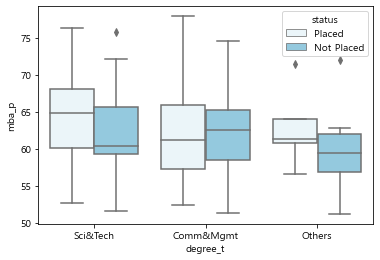

In [29]:
sns.boxplot(x='degree_t',y='mba_p',hue='status',data=data, color = 'skyblue')
plt.show()

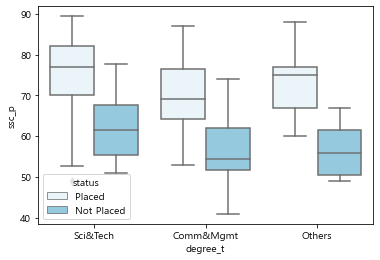

In [30]:
sns.boxplot(x='degree_t',y='ssc_p',hue='status',data=data, color = 'skyblue')
plt.show()

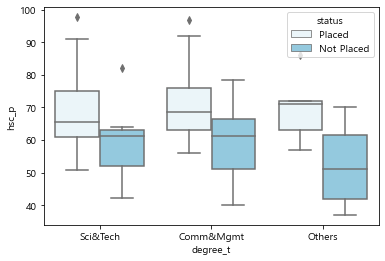

In [31]:
sns.boxplot(x='degree_t',y='hsc_p',hue='status',data=data, color = 'skyblue')
plt.show()

<AxesSubplot:>

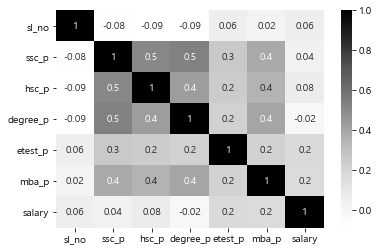

In [32]:
sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap='Greys')

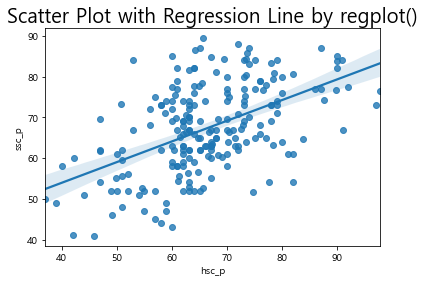

In [33]:
# Scatter Plot with regression line by seaborn regplot()

sns.regplot(x=data['hsc_p'], 
           y=data['ssc_p'], 
           fit_reg=True) # default

plt.title('Scatter Plot with Regression Line by regplot()', fontsize=20)

plt.show()


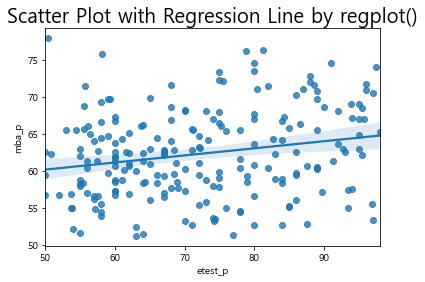

In [34]:
# Scatter Plot with regression line by seaborn regplot()

sns.regplot(x=data['etest_p'], 
           y=data['mba_p'], 

           fit_reg=True) # default

plt.title('Scatter Plot with Regression Line by regplot()', fontsize=20)

plt.show()


_____________________________________________________________________
### test

In [35]:
print("data크기",data.shape)# data크기 행,열

data크기 (215, 15)


> data.groupby(["salary","gender"]).size().unstack().dropna(axis=1)
여기서 dropna(axis=1)에서 axis=1을 하면 열을 기준으로 데이터를 삭제.   
axis = 0을 하면 행을 기준으로 데이터를 삭제    
즉, dropna(axis=1)은 누락된 열을 통째로 날려버리는 것이다.

In [36]:
print("target의 타입:", type(data['status']))

target의 타입: <class 'pandas.core.series.Series'>


In [37]:
print("target의 크기 : ", data['status'].shape)

target의 크기 :  (215,)


In [38]:
print('타깃:\n', data['status'])

타깃:
 0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object


▼ 참고용

In [39]:
# 판다스로 데이터 전처리(status의 placed, not placed를 0과 1로 바꾸어줌)
X_df = pd.get_dummies(data['status'],drop_first=True)
print(X_df)
# 0이 Not Placed, 1이 Placed. drop_first는 첫번째 열을 바로 삭제한다는 의미

     Placed
0         1
1         1
2         1
3         0
4         1
..      ...
210       1
211       1
212       1
213       1
214       0

[215 rows x 1 columns]


---------------------------------------------------------------------

iloc/loc 데이터프레임에서 행과 열 선택하는 방법
iloc는 열을 불러온다

In [40]:
data.iloc[:,13:15]

,status,salary
0,Placed,270000.0
1,Placed,200000.0
2,Placed,250000.0
3,Not Placed,NaN
4,Placed,425000.0
...,...,...
210,Placed,400000.0
211,Placed,275000.0
212,Placed,295000.0
213,Placed,204000.0


In [41]:
a = data.loc[data.isnull()["salary"],:]
a

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [42]:
word = ['Not Placed']
all(a['status'].isin(word))

True

In [43]:
a['status'].item

<bound method IndexOpsMixin.item of 3      Not Placed
5      Not Placed
6      Not Placed
9      Not Placed
12     Not Placed
          ...    
198    Not Placed
201    Not Placed
206    Not Placed
208    Not Placed
214    Not Placed
Name: status, Length: 67, dtype: object>

In [44]:
data = data.fillna(0)
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [45]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


gender 열의 남자/여자를 0,1로 바꾸어줌.

In [46]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [47]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [48]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [49]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [50]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [51]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [53]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [54]:
# dict 생성
exp_dic = {"M" : 0,
          "F":1, 
          "Others":0,
          "Central":1,
           "Yes":0,
           "No":1,
           "Mkt&HR":0,
           "Mkt&Fin":1,
           "Placed":0,
           "Not Placed":1
          }
# "Commerce":0,"Science":1, "Arts":2

In [55]:
# 해당 컬럼에 replace함수와 dict 적용
data = data.replace(exp_dic)

In [56]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,1,55.0,0,58.80,0,270000.0
1,2,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,0,86.5,1,66.28,0,200000.0
2,3,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,1,75.0,1,57.80,0,250000.0
3,4,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,1,66.0,0,59.43,1,0.0
4,5,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,1,96.8,1,55.50,0,425000.0


그런데 수치형으로 바꾸면 숫자가 의미를 갖는 경우가 생긴다.    
즉, 순서가 없는 범주형 데이터를 수치형으로 바꿔줌으로써 크기를 비교할 수 있다.    따라서 이것을 바꿔주기 위한 다른 방법이 필요하다.    
먼저 0과 1로만 나눠지는 데이터가 아니라 3가지 이상의 범주형 데이터로 구성된 변수를 찾아보자.

In [57]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [58]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 0], dtype=object)

위를 보면 3가지 이상의 범주형 데이터로 구성된 열은 2개가 있음을 알 수 있다.    
hsc_s 열과 degree_t 열은 3가지 이상의 범주형 데이터로 구성되었다.

In [59]:
data = pd.get_dummies(data, drop_first=True)
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,1,0,67.00,0,91.00,0,58.00,1,55.0,0,58.80,0,270000.0,1,0,0,1
1,2,0,79.33,1,78.33,0,77.48,0,86.5,1,66.28,0,200000.0,0,1,0,1
2,3,0,65.00,1,68.00,1,64.00,1,75.0,1,57.80,0,250000.0,0,0,1,0
3,4,0,56.00,1,52.00,1,52.00,1,66.0,0,59.43,1,0.0,0,1,0,1
4,5,0,85.80,1,73.60,1,73.30,1,96.8,1,55.50,0,425000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,77.60,1,91.0,1,74.49,0,400000.0,1,0,1,0
211,212,0,58.00,0,60.00,0,72.00,1,74.0,1,53.62,0,275000.0,0,1,0,1
212,213,0,67.00,0,67.00,0,73.00,0,59.0,1,69.72,0,295000.0,1,0,1,0
213,214,1,74.00,0,66.00,0,58.00,1,70.0,0,60.23,0,204000.0,1,0,1,0


drop_first를 해주어 변수간 상관관계 감소시키기/

In [60]:
data.rename(columns = {'degree_t_0': 'degree_t_Others'}, inplace = True)

In [61]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,1,0,67.00,0,91.00,0,58.00,1,55.0,0,58.80,0,270000.0,1,0,0,1
1,2,0,79.33,1,78.33,0,77.48,0,86.5,1,66.28,0,200000.0,0,1,0,1
2,3,0,65.00,1,68.00,1,64.00,1,75.0,1,57.80,0,250000.0,0,0,1,0
3,4,0,56.00,1,52.00,1,52.00,1,66.0,0,59.43,1,0.0,0,1,0,1
4,5,0,85.80,1,73.60,1,73.30,1,96.8,1,55.50,0,425000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,77.60,1,91.0,1,74.49,0,400000.0,1,0,1,0
211,212,0,58.00,0,60.00,0,72.00,1,74.0,1,53.62,0,275000.0,0,1,0,1
212,213,0,67.00,0,67.00,0,73.00,0,59.0,1,69.72,0,295000.0,1,0,1,0
213,214,1,74.00,0,66.00,0,58.00,1,70.0,0,60.23,0,204000.0,1,0,1,0


In [62]:
# data['degree_t_Others'].unique()
# degree_t_Others 열 삭제됨. 
# hsc_s Arts사라짐

In [63]:
round(data.corr(),2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
sl_no,1.00,-0.07,-0.08,-0.03,-0.09,-0.12,-0.09,-0.06,0.06,-0.05,0.02,0.03,0.00,-0.02,0.02,-0.04,0.01
gender,-0.07,1.00,0.07,0.02,0.02,0.07,0.17,0.09,-0.08,-0.11,0.30,0.09,-0.14,0.00,-0.04,0.04,-0.08
ssc_p,-0.08,0.07,1.00,-0.12,0.51,-0.07,0.54,-0.18,0.26,0.17,0.39,-0.61,0.54,-0.10,0.19,-0.18,0.22
ssc_b,-0.03,0.02,-0.12,1.00,0.14,0.61,-0.04,-0.04,0.02,-0.05,-0.08,0.04,-0.03,0.06,-0.06,0.09,-0.10
hsc_p,-0.09,0.02,0.51,0.14,1.00,0.02,0.43,-0.14,0.25,0.24,0.35,-0.49,0.45,0.26,-0.23,0.11,-0.05
hsc_b,-0.12,0.07,-0.07,0.61,0.02,1.00,-0.07,0.04,-0.04,0.00,-0.09,0.02,-0.01,0.07,-0.13,0.03,-0.09
degree_p,-0.09,0.17,0.54,-0.04,0.43,-0.07,1.00,-0.12,0.22,0.22,0.40,-0.48,0.41,-0.02,0.09,-0.03,0.12
workex,-0.06,0.09,-0.18,-0.04,-0.14,0.04,-0.12,1.00,-0.06,-0.19,-0.17,0.28,-0.30,0.06,-0.03,0.10,-0.10
etest_p,0.06,-0.08,0.26,0.02,0.25,-0.04,0.22,-0.06,1.00,0.24,0.22,-0.13,0.19,-0.02,0.06,-0.01,0.01
specialisation,-0.05,-0.11,0.17,-0.05,0.24,0.00,0.22,-0.19,0.24,1.00,0.11,-0.25,0.28,0.13,-0.17,0.10,-0.06


degree_t_Comm&Mgmt랑 degree_t_Sci&Tech는 상관관계가 0.89로 매우 높다.    
hsc_s_Commerce와 hsc_s_Science도 0.9로 매우 높음    
또한 salary와 status도 상관관계가 매우 높다.    

<AxesSubplot:>

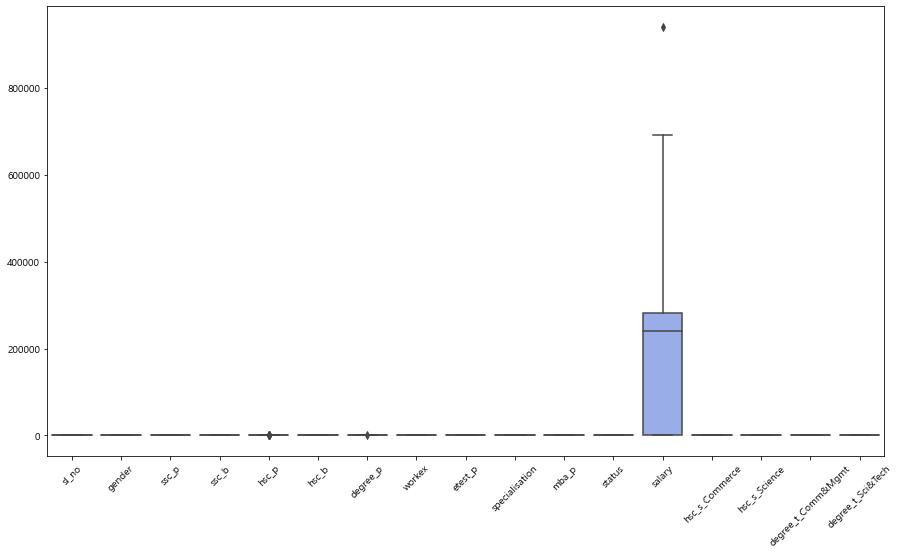

In [64]:
from matplotlib import pyplot
a4_dims = (15,8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=45)
sns.boxplot(data=data)
# y_lim=(np.min(y_values),np.max(y_values)))

xticks함수를 이용해 45도 기울임. 텍스트 겹침을 방지.

<AxesSubplot:>

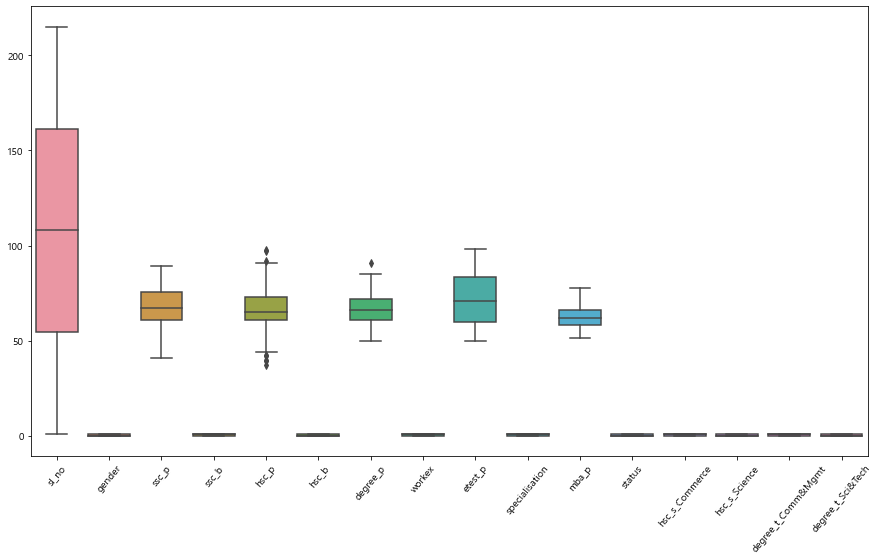

In [65]:
from matplotlib import pyplot
a4_dims = (15,8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=50)
sns.boxplot(data=data.drop(columns=['salary']))

In [66]:
#a = data.loc[:,['hsc_s_Arts','degree_t_Others']]
# sns.boxplot(data=a)

<AxesSubplot:>

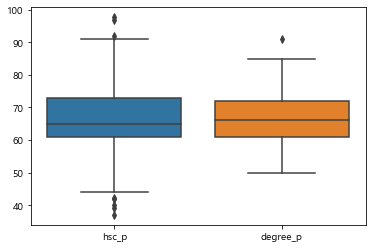

In [67]:
a = data.loc[:,['hsc_p','degree_p']]
sns.boxplot(data=a)

In [68]:
data['hsc_p'][:]

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_p, Length: 215, dtype: float64

<AxesSubplot:xlabel='hsc_p'>

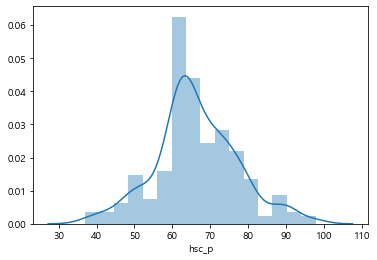

In [69]:
sns.distplot(data["hsc_p"])

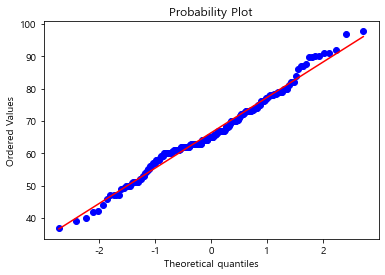

In [70]:
import scipy.stats as stats
dd = data['hsc_p']

stats.probplot(dd, plot=plt)
plt.show()

<AxesSubplot:xlabel='degree_p'>

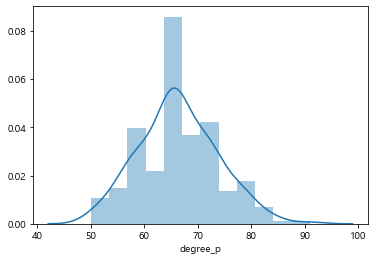

In [71]:
sns.distplot(data["degree_p"])

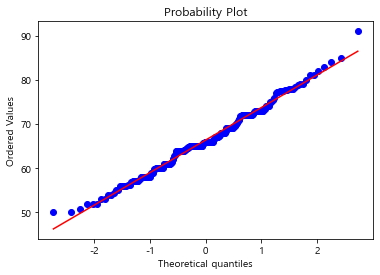

In [72]:
import scipy.stats as stats
dd = data['degree_p']

stats.probplot(dd, plot=plt)
plt.show()

q-q plot을 그려보았을때 빨간 선에 점이 잘 있을수록 정규성이 있는 것인데 그렇게 위치되어있으므로 정규성이 있다고 볼 수 있음

<AxesSubplot:xlabel='salary'>

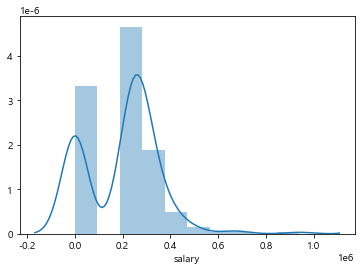

In [73]:
sns.distplot(data['salary'])

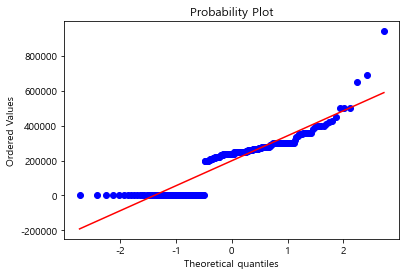

In [74]:
import scipy.stats as stats
dd = data['salary']

stats.probplot(dd, plot=plt)
plt.show()

정규성 검정 알아본다음에 정규성을 안따르면 P값이 알파값보다 작으면    
H0기각 H1채택되면서 정규성을 따르지 않는다고 나와서 정규분포를 따르지 않게 되는것.    

왜도&첨도알아보기.

In [75]:
from scipy.stats import skew, kurtosis

# 왜도
skew(data['hsc_p'])

# 첨도
#kurtosis(data, fisher=True)

0.16249524333889379

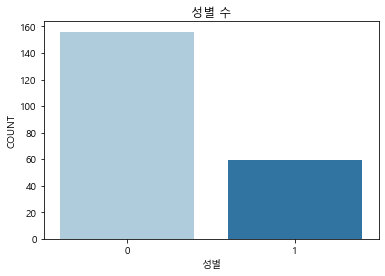

In [76]:
sns.countplot("degree_t_Sci&Tech", palette = 'Paired',data=data)
plt.title("성별 수")
plt.xlabel("성별")
plt.ylabel("COUNT")
plt.show()

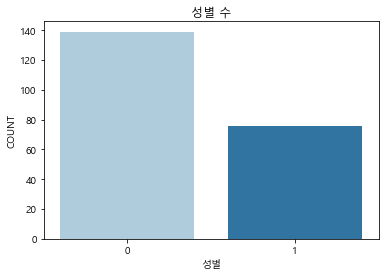

In [77]:
sns.countplot("gender", palette = 'Paired',data=data)
plt.title("성별 수")
plt.xlabel("성별")
plt.ylabel("COUNT")
plt.show()

[박스플롯 그리는 방법 링크]    
https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221813848875&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

In [78]:
# y_arr = np.array(X_df)
# X_arr=np.array(data['ssc_p'])

=====================================    

In [79]:
data_X = data.drop(columns=['status','sl_no', 'salary'])

In [80]:
# status는 레이블로 사용할거니까 빼준다.
# 또한 salary또한 레이블 status에 파생되는 변수이므로 빼준다.
# sl_no는 의미없는 변수이므로 빼준다.
# mba_p는 경영석사 성적으로 여기서는 고려하지 않는다
# ssc_b와 hsc_b는 학교가 cetral인지 others인지인데 취업과 상관 없으니까 뺴준다

In [81]:
data_X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,0,67.00,0,91.00,0,58.00,1,55.0,0,58.80,1,0,0,1
1,0,79.33,1,78.33,0,77.48,0,86.5,1,66.28,0,1,0,1
2,0,65.00,1,68.00,1,64.00,1,75.0,1,57.80,0,0,1,0
3,0,56.00,1,52.00,1,52.00,1,66.0,0,59.43,0,1,0,1
4,0,85.80,1,73.60,1,73.30,1,96.8,1,55.50,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,77.60,1,91.0,1,74.49,1,0,1,0
211,0,58.00,0,60.00,0,72.00,1,74.0,1,53.62,0,1,0,1
212,0,67.00,0,67.00,0,73.00,0,59.0,1,69.72,1,0,1,0
213,1,74.00,0,66.00,0,58.00,1,70.0,0,60.23,1,0,1,0


--------------------------------------------------------------------------     
참고

In [82]:
data_X.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
gender,1.000000,0.068969,0.019429,0.021334,0.065945,0.173217,0.085153,-0.084294,-0.106160,0.300531,0.001087,-0.042682,0.036215,-0.084072
ssc_p,0.068969,1.000000,-0.116194,0.511472,-0.066996,0.538404,-0.175675,0.261993,0.172536,0.388478,-0.101323,0.189847,-0.179581,0.221235
ssc_b,0.019429,-0.116194,1.000000,0.137013,0.605883,-0.038070,-0.040744,0.018991,-0.051565,-0.083120,0.056671,-0.058505,0.094939,-0.101060
hsc_p,0.021334,0.511472,0.137013,1.000000,0.019548,0.434206,-0.141025,0.245113,0.241630,0.354823,0.258093,-0.226675,0.112816,-0.053599
hsc_b,0.065945,-0.066996,0.605883,0.019548,1.000000,-0.067229,0.038357,-0.039108,0.002232,-0.090201,0.073522,-0.126446,0.027440,-0.086548
degree_p,0.173217,0.538404,-0.038070,0.434206,-0.067229,1.000000,-0.122648,0.224470,0.218286,0.402364,-0.022724,0.092006,-0.032755,0.123477
workex,0.085153,-0.175675,-0.040744,-0.141025,0.038357,-0.122648,1.000000,-0.056735,-0.191174,-0.168811,0.056719,-0.033270,0.102517,-0.102962
etest_p,-0.084294,0.261993,0.018991,0.245113,-0.039108,0.224470,-0.056735,1.000000,0.236315,0.218055,-0.021732,0.055352,-0.012531,0.009748
specialisation,-0.106160,0.172536,-0.051565,0.241630,0.002232,0.218286,-0.191174,0.236315,1.000000,0.105728,0.129985,-0.166639,0.101331,-0.061503
mba_p,0.300531,0.388478,-0.083120,0.354823,-0.090201,0.402364,-0.168811,0.218055,0.105728,1.000000,-0.049415,0.048050,-0.102088,0.125009


===========================================================================================

In [83]:
# 정규화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
data_X_std = stdsc.fit_transform(data_X)

In [84]:
data_X_std

array([[-0.73943397, -0.02808697, -1.08245885, ..., -0.85666269,
        -1.43924583,  1.62605898],
       [-0.73943397,  1.11336869,  0.92382264, ...,  1.16732059,
        -1.43924583,  1.62605898],
       [-0.73943397, -0.21323793,  0.92382264, ..., -0.85666269,
         0.69480833, -0.61498384],
       ...,
       [-0.73943397, -0.02808697, -1.08245885, ..., -0.85666269,
         0.69480833, -0.61498384],
       [ 1.35238581,  0.61994138, -1.08245885, ..., -0.85666269,
         0.69480833, -0.61498384],
       [-0.73943397, -0.49096436,  0.92382264, ...,  1.16732059,
         0.69480833, -0.61498384]])

In [85]:
real_data = pd.DataFrame(data_X_std)

In [86]:
round(real_data.head(),3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.739,-0.028,-1.082,2.269,-0.801,-1.140,0.724,-1.291,-1.124,-0.598,0.950,-0.857,-1.439,1.626
1,-0.739,1.113,0.924,1.103,-0.801,1.513,-1.380,1.087,0.890,0.688,-1.053,1.167,-1.439,1.626
2,-0.739,-0.213,0.924,0.153,1.249,-0.323,0.724,0.219,0.890,-0.769,-1.053,-0.857,0.695,-0.615
3,-0.739,-1.046,0.924,-1.318,1.249,-1.957,0.724,-0.461,-1.124,-0.489,-1.053,1.167,-1.439,1.626
4,-0.739,1.712,0.924,0.668,1.249,0.944,0.724,1.865,0.890,-1.165,0.950,-0.857,0.695,-0.615


In [87]:
a = data_X.columns
real_data.columns = a
round(real_data.head(),3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,-0.739,-0.028,-1.082,2.269,-0.801,-1.140,0.724,-1.291,-1.124,-0.598,0.950,-0.857,-1.439,1.626
1,-0.739,1.113,0.924,1.103,-0.801,1.513,-1.380,1.087,0.890,0.688,-1.053,1.167,-1.439,1.626
2,-0.739,-0.213,0.924,0.153,1.249,-0.323,0.724,0.219,0.890,-0.769,-1.053,-0.857,0.695,-0.615
3,-0.739,-1.046,0.924,-1.318,1.249,-1.957,0.724,-0.461,-1.124,-0.489,-1.053,1.167,-1.439,1.626
4,-0.739,1.712,0.924,0.668,1.249,0.944,0.724,1.865,0.890,-1.165,0.950,-0.857,0.695,-0.615


In [88]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              215 non-null    float64
 1   ssc_p               215 non-null    float64
 2   ssc_b               215 non-null    float64
 3   hsc_p               215 non-null    float64
 4   hsc_b               215 non-null    float64
 5   degree_p            215 non-null    float64
 6   workex              215 non-null    float64
 7   etest_p             215 non-null    float64
 8   specialisation      215 non-null    float64
 9   mba_p               215 non-null    float64
 10  hsc_s_Commerce      215 non-null    float64
 11  hsc_s_Science       215 non-null    float64
 12  degree_t_Comm&Mgmt  215 non-null    float64
 13  degree_t_Sci&Tech   215 non-null    float64
dtypes: float64(14)
memory usage: 23.6 KB


In [89]:
print("중복되는 데이터는 ",real_data.duplicated().sum(),"개 이다.")

중복되는 데이터는  0 개 이다.


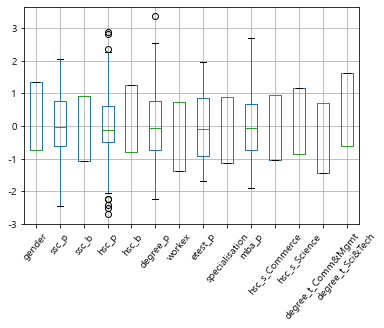

In [90]:
real_data.boxplot()
plt.xticks(rotation=50)
plt.show()

In [91]:
real_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,-0.739434,-0.028087,-1.082459,2.268812,-0.800763,-1.140102,0.724446,-1.291091,-1.123903,-0.597647,0.950082,-0.856663,-1.439246,1.626059
1,-0.739434,1.113369,0.923823,1.103448,-0.800763,1.513267,-1.380364,1.087157,0.889757,0.687620,-1.052541,1.167321,-1.439246,1.626059
2,-0.739434,-0.213238,0.923823,0.153313,1.248809,-0.322843,0.724446,0.218908,0.889757,-0.769474,-1.052541,-0.856663,0.694808,-0.614984
3,-0.739434,-1.046417,0.923823,-1.318339,1.248809,-1.957362,0.724446,-0.460592,-1.123903,-0.489396,-1.052541,1.167321,-1.439246,1.626059
4,-0.739434,1.712332,0.923823,0.668391,1.248809,0.943909,0.724446,1.864806,0.889757,-1.164676,0.950082,-0.856663,0.694808,-0.614984


In [92]:
round(real_data.describe())

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
count,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-1.0,-3.0,-1.0,-2.0,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-0.0,1.0,-0.0,-1.0,-0.0,1.0,-0.0,1.0,-0.0,1.0,-1.0,1.0,-1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
max,1.0,2.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0


In [93]:
#성능평가 패키지 import
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(real_data,data['status'],test_size=0.3, 
                                                    shuffle=True, #무작위추출
                                               stratify = data['status'],random_state=0)

In [95]:
#from sklearn.feature_selection import SelectPercentile
#select = SelectPercentile(score_funct=f_regression, percentile = 50)
#select.fit(X_train,y_train)

In [96]:
print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)
print("X_test크기:",X_test.shape)
print("y_test크기:",y_test.shape)

X_train 크기 :  (150, 14)
y_train 크기 :  (150,)
X_test크기: (65, 14)
y_test크기: (65,)


In [97]:
print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)

X_train 크기 :  (150, 14)
y_train 크기 :  (150,)


In [98]:
print("X_test크기:",X_test.shape)
print("y_test크기:",y_test.shape)

X_test크기: (65, 14)
y_test크기: (65,)


In [99]:
data.shape

(215, 17)

In [100]:
# y = pd.DataFrame(y_test)
# display(y['status'].value_counts())
display(y_test.value_counts())

0    45
1    20
Name: status, dtype: int64

In [101]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 14) (65, 14) (150,) (65,)


215개의 데이터 중 150개를 train으로 가져가고 65개를 test로 가져갔음.    


> pip install --upgrade mglearn   
→ mglearn설치안될때 입력하기

In [102]:
# 정규화한 후 회귀모델 적합한지 확인.
# train & 회귀모델 적합
import statsmodels.api as sm
full_model = sm.OLS(y_train,X_train)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 status   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              5.321
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                    5.41e-08
Time:                        19:29:33   Log-Likelihood:                         -93.042
No. Observations:                 150   AIC:                                      214.1
Df Residuals:                     136   BIC:                                      256.2
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
gender                 0.0137      0.046      0.297      0.767      -0.077       0.105
ssc_p                 -0.2043      0.056     -3.651      0.000      -0.315      -0.094
ssc_b                  0.0631      0.052      1.223      0.223      -0.039       0.165
hsc_p                 -0.0735      0.052     -1.413      0.160      -0.176       0.029
hsc_b                 -0.0339      0.050     -0.676      0.500      -0.133       0.065
degree_p              -0.1302      0.051     -2.568      0.011      -0.230      -0.030
workex                 0.1045      0.041      2.545      0.012       0.023       0.186
etest_p                0.0282      0.042      0.668      0.505      -0.055       0.112
specialisation        -0.0221      0.043     -0.519      0.604      -0.106       0.062
mba_p                  0.1392      0.046      3.043      0.003       0.049       0.230
hsc_s_Commerce         0.0137      0.095      0.144      0.886      -0.175       0.202
hsc_s_Science         -0.0347      0.108     -0.322      0.748      -0.248       0.179
degree_t_Comm&Mgmt     0.0316      0.113      0.279      0.781      -0.192       0.255
degree_t_Sci&Tech      0.1305      0.119      1.101      0.273      -0.104       0.365
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.260
Skew:                           0.089   Prob(JB):                        0.533
Kurtosis:                       2.588   Cond. No.                         8.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS(Ordinary Least Square)는 가장 기본적인 결정론적 회귀방법으로 잔차제곱합을 최소화하는 가중치 벡터를 행렬미분으로 구하는 방법.    
즉, 최소자승법으로 회귀모델을 구하는 메서드.    
R^2를 보면 0.535로 낮은 편. 이렇게 변수가 많아질수록 변수 하나하나에 대한 신뢰도는 ... Warning을 보면 강한 다중공선성 문제가 있을 수 있다고 한다.

In [103]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(real_data.values, i) for i in range(real_data.shape[1])]
vif["features"] = real_data.columns
vif.round(1)

,VIF Factor,features
0,1.2,gender
1,2.0,ssc_p
2,1.8,ssc_b
3,1.9,hsc_p
4,1.7,hsc_b
5,1.7,degree_p
6,1.1,workex
7,1.2,etest_p
8,1.2,specialisation
9,1.5,mba_p


vif(분산팽창요인)    
독립변수에 의존하는 변수를 없애는 것.    
vif는 독립변수를 다른 독립변수로 선형회귀한 성능    
R^2는 다른변수로 i번째 변수를 선형회귀한 성능(결정계수)이다.    
결정계수가 클수록 다른 변수에 의존적인 것이므로 vif가 커짐.    


vif가 10이 넘을 경우 다중공선성 의심.

In [104]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_train)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_train)
print("원본 데이터 형태: {}".format(str(X_train.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

# 원본 데이터 형태: (569, 30)
# 축소된 데이터 형태: (569, 2)

원본 데이터 형태: (150, 14)
축소된 데이터 형태: (150, 2)


In [105]:
# Report
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
# 성능평가 결과 입력 데이터프레임 생성
df_per = pd.DataFrame(columns=['Classifier','F-Measure','Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


knn을 사용한 이유    
먼저 이해하기 쉬운 모델이어서, 복잡한 모델을 적용하기 전에 시범적으로 사용하므로.


In [107]:
# Knn 최적의 파라미터를 찾는 법
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier()
param = {
    'n_neighbors':[1,3,5,7,10,100],
    'p':[1,2]
}
grid_knn = GridSearchCV(knn, param_grid = param, scoring = 'accuracy',cv= 10)

In [108]:
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 5, 'p': 2}

In [109]:
knn2 = grid_knn.best_estimator_
knn2.fit(X_train,y_train)
pred_knn2 = knn2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(knn2.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_knn2==y_test)))

테스트 세트의 정확도 : 0.8154
테스트 세트의 정확도 : 0.8154


print("최고 평균 정확도 : {:.4f}".format(grid_knn.best_score_))

In [110]:
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        45
           1       0.75      0.60      0.67        20

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



In [111]:
# 성능저장
fm = round(f1_score(y_test,pred_knn2),2)
ac = round(accuracy_score(y_test, pred_knn2, normalize = True),2)
df_per.loc[len(df_per)]=['knn',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# 최적의 파라미터를 찾는 법
lr = LogisticRegression()
param = {
    'C' : [0.0001,0.01,0.1,1,10,100,1000,10000],
    'solver' : ['liblinear'],
    #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'penalty' : ['l1','l2']
    # gamma는 일종의 상수값을 변동시킬 수 있었음.
}
grid_lr = GridSearchCV(lr, param_grid = param,cv= 13)

In [113]:
grid_lr.fit(X_train,y_train)
grid_lr.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [114]:
# 최적의 조합으로
lr3 = grid_lr.best_estimator_
lr3.fit(X_train,y_train)
pred_lr3 = lr3.predict(X_test)
print(classification_report(y_test, pred_lr3))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.74      0.85      0.79        20

    accuracy                           0.86        65
   macro avg       0.83      0.86      0.84        65
weighted avg       0.87      0.86      0.86        65



In [115]:
# predict로 예측.
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(pred_lr3==y_test)))
print("테스트 점수 : {:.2f}".format(lr3.score(X_test, y_test)))

테스트 세트의 정확도 : 0.86
테스트 점수 : 0.86


accuracy_score 함수를 사용해 마찬가지로 실제 값과 예측 값을 비교해 accuracy를 구함   
normalize = True를 사용해 정확도를 출력   
round 함수를 사용해 소수점 2번째 자리까지 표현   
▼이렇게 구한 정확도를 변수 ac에 저장

In [116]:
ac = round(accuracy_score(y_test,pred_lr3,normalize = True),2)

In [117]:
# fm과 ac를 데이터프레임 df_per에 loc함수를 사용해 입력
df_per.loc[len(df_per)]=["Logistic Regression(liblinear)",fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82
1,Logistic Regression(liblinear),0.67,0.86


In [118]:
param = {
    'C' : [0.0001,0.01,0.1,1,10,100,1000,10000],
    'solver' : ['saga'],
    #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    # 최적화에 사용할 알고리즘 결정
    # 'sag', 'lbfgs', 'newton-cg'는 l2만 지원
    'penalty' : ['l2']
    # gamma는 일종의 상수값을 변동시킬 수 있었음.
}
lr = LogisticRegression(max_iter = 4000)
# 수렴경고땜시 넣음
grid_lrg = GridSearchCV(lr, param_grid = param, scoring = 'accuracy',cv= 13)

sag는 Stochastic Average Gradient    
SAGA 알고리즘은 Ridge, RidgeClassifier, LogisticRegression 등에 solver 매개변수를 ‘saga’로 설정하여 사용할 수 있습니다. 이 모델들은 대량의 데이터셋에서 SAG 알고리즘을 사용할 수 있었는데 SAGA가 SAG 보다 성능이 좋으므로 데이터셋이 클 경우 SAGA를 항상 사용하는 것이 좋을 것 같습니다.

In [119]:
import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(action='default')
grid_lrg.fit(X_train,y_train)
grid_lrg.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'saga'}

In [120]:
lrg2 = grid_lrg.best_estimator_
lrg2.fit(X_train,y_train)
pred_lrg2 = lrg2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_lrg2==y_test)))
print("최고 평균 정확도 : {:.4f}".format(grid_lrg.best_score_))
print('테스트 정확도:%.3f' % lrg2.score(X_test,y_test) )

테스트 세트의 정확도 : 0.8615
최고 평균 정확도 : 0.8788
테스트 정확도:0.862


In [121]:
print(classification_report(y_test, pred_lrg2))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.74      0.85      0.79        20

    accuracy                           0.86        65
   macro avg       0.83      0.86      0.84        65
weighted avg       0.87      0.86      0.86        65



In [122]:
# 성능저장
fm = round(f1_score(y_test,pred_lrg2),2)
ac = round(accuracy_score(y_test, pred_lrg2, normalize = True),2)
df_per.loc[len(df_per)]=['Logistic Regression(saga)',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82
1,Logistic Regression(liblinear),0.67,0.86
2,Logistic Regression(saga),0.79,0.86


과대적합을 방지하기 위해 피처의 계수를 가능한 작게 해준다.    
모든 피처의 회귀계수를 작게 하여 각 피처가 주는 영향력(다중공선성 방지)을 최소화 한다.    
이를 규제라고 함. L2규제

In [123]:
# Ridge 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
param = {
    'alpha' : [0.0001,0.01,0.1,1,10,100,1000,10000],
    }

grid_rid = GridSearchCV(ridge, param_grid = param, cv= 13)

In [124]:
grid_rid.fit(X_train,y_train)
grid_rid.best_params_

{'alpha': 10}

In [125]:
rid2 = grid_rid.best_estimator_
rid2.fit(X_train,y_train)
pred_rid2 = rid2.predict(X_test)
print("최고 평균 정확도 : {:.4f}".format(grid_rid.best_score_))
print('테스트 정확도:%.3f' % rid2.score(X_test,y_test) )
print("평가용 데이터 세트 점수 : {:.2f}".format(rid2.score(X_test, y_test)))

최고 평균 정확도 : 0.4013
테스트 정확도:0.514
평가용 데이터 세트 점수 : 0.51


In [126]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000)
param = {
    'alpha' : [0.0001,0.01,0.1,1,10,100,1000,10000]
    }
grid_las = GridSearchCV(lasso, param_grid = param, cv= 13)

In [127]:
grid_las.fit(X_train,y_train)
grid_las.best_params_

{'alpha': 0.01}

In [128]:
las2 = grid_las.best_estimator_
las2.fit(X_train,y_train)
pred_las2 = las2.predict(X_test)
print("최고 평균 정확도 : {:.4f}".format(grid_las.best_score_))
print('테스트 정확도:%.3f' % las2.score(X_test,y_test) )
print("평가용 데이터 세트 점수 : {:.2f}".format(las2.score(X_test, y_test)))

최고 평균 정확도 : 0.3888
테스트 정확도:0.504
평가용 데이터 세트 점수 : 0.50


In [129]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
# 트리의 깊이는 보통 2칸. 이진트리니까 2개씩 갈라지는 것.
pred_tree = tree.predict(X_test)
# predict로 예측.
print("테스트 점수 : {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수 : 0.83


In [130]:
# Decision Tree 최적의 파라미터를 찾는 법
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,5,7,10,100],
    'min_samples_split':[2,5,10]
}
grid_dtc = GridSearchCV(dtc, param_grid = param, scoring = 'accuracy',cv= 10)

In [131]:
grid_dtc.fit(X_train, y_train)
grid_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}

In [132]:
dtc2 = grid_dtc.best_estimator_
dtc2.fit(X_train,y_train)
pred_dtc2 = dtc2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(dtc2.score(X_test, y_test)))

테스트 세트의 정확도 : 0.7538


In [133]:
print(classification_report(y_test,pred_dtc2))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.58      0.75      0.65        20

    accuracy                           0.75        65
   macro avg       0.72      0.75      0.73        65
weighted avg       0.78      0.75      0.76        65



In [134]:
# 성능저장
fm = round(f1_score(y_test,pred_dtc2),2)
ac = round(accuracy_score(y_test, pred_dtc2, normalize = True),2)
df_per.loc[len(df_per)]=['Decision Tree',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82
1,Logistic Regression(liblinear),0.67,0.86
2,Logistic Regression(saga),0.79,0.86
3,Decision Tree,0.65,0.75


In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_param_grid = {
    'n_estimators' : [100,200],
    # 결정트리 개수
    'max_depth' : [3,5,7,9],
    # 트리의 깊이
    'min_samples_split' : [2,3,5]
    # 노드를 분할하기 위한 최소한의 데이터 수
}
grid_rfc = GridSearchCV(rfc, param_grid = rf_param_grid, scoring = 'accuracy',cv= 10)

In [136]:
grid_rfc.fit(X_train,y_train)
grid_rfc.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}

In [137]:
rfc2 = grid_rfc.best_estimator_
rfc2.fit(X_train,y_train)
pred_rfc2 = rfc2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(rfc2.score(X_test, y_test)))

테스트 세트의 정확도 : 0.8923


In [138]:
# 최적의 조합으로
rfc2 = grid_rfc.best_estimator_
rfc2.fit(X_train,y_train)
pred_rfc2 = rfc2.predict(X_test)
print(classification_report(y_test, pred_rfc2))
# print("테스트 데이터 예측 정확도 : {:.2f}".format(np.mean(pred_rfc2==y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.82      0.70      0.76        20

    accuracy                           0.86        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.86      0.86      0.86        65



In [139]:
print("테스트 데이터 예측 정확도 : {:.4f}".format(np.mean(pred_rfc2==y_test)))

테스트 데이터 예측 정확도 : 0.8615


print("최고 평균 정확도 : {:.4f}".format(grid_rfc.best_score_))

In [140]:
importances = rfc2.feature_importances_
indices = np.argsort(importances)[::-1]

In [141]:
feat_labels = data_X.columns[:]
for f in range(X_train.shape[1]):
              print("%2d)%-*s %f" % (f+1, 30, 
                   feat_labels[indices[f]],
                   importances[indices[f]]))

 1)ssc_p                          0.272682
 2)degree_p                       0.192827
 3)hsc_p                          0.161270
 4)mba_p                          0.110721
 5)etest_p                        0.085997
 6)workex                         0.044433
 7)specialisation                 0.026243
 8)gender                         0.023955
 9)ssc_b                          0.020087
10)hsc_b                          0.015855
11)hsc_s_Science                  0.014020
12)degree_t_Comm&Mgmt             0.012525
13)hsc_s_Commerce                 0.011315
14)degree_t_Sci&Tech              0.008071


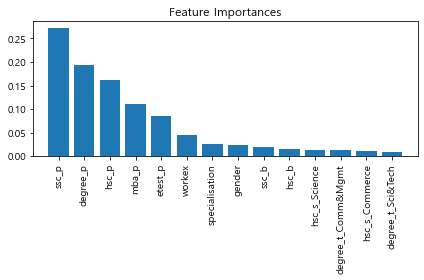

In [142]:
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [143]:
# 성능저장
fm = round(f1_score(y_test,pred_rfc2),2)
ac = round(accuracy_score(y_test, pred_rfc2, normalize = True),2)
df_per.loc[len(df_per)]=['Random Forest',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82
1,Logistic Regression(liblinear),0.67,0.86
2,Logistic Regression(saga),0.79,0.86
3,Decision Tree,0.65,0.75
4,Random Forest,0.76,0.86


In [144]:
# SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [145]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.80      0.80      0.80        20

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



In [146]:
# 최적의 파라미터를 찾는 법
from sklearn.svm import SVC
svc = SVC()
param = {
    'C' : [0.01, 0.1,0.8,0.9,1,1.1,1.2,1.4],
    'kernel' : ['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
    # gamma는 일종의 상수값을 변동시킬 수 있었음.
}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy',cv= 10)

In [147]:
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [148]:
# 최적의 조합으로
svc2 = grid_svc.best_estimator_
svc2.fit(X_train,y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.74      0.85      0.79        20

    accuracy                           0.86        65
   macro avg       0.83      0.86      0.84        65
weighted avg       0.87      0.86      0.86        65



In [149]:
print("테스트 세트의 정확도 : {:.4f}".format(svc2.score(X_test, y_test)))

테스트 세트의 정확도 : 0.8615


In [150]:
# predict로 예측.
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(pred_svc2==y_test)))

테스트 세트의 정확도 : 0.86


In [151]:
# 성능저장
fm = round(f1_score(y_test,pred_svc2),2)
ac = round(accuracy_score(y_test, pred_svc2, normalize = True),2)
df_per.loc[len(df_per)]=['SVC',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,knn,0.67,0.82
1,Logistic Regression(liblinear),0.67,0.86
2,Logistic Regression(saga),0.79,0.86
3,Decision Tree,0.65,0.75
4,Random Forest,0.76,0.86
5,SVC,0.79,0.86


In [152]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
knn,0.67,0.82
Logistic Regression(liblinear),0.67,0.86
Logistic Regression(saga),0.79,0.86
Decision Tree,0.65,0.75
Random Forest,0.76,0.86
SVC,0.79,0.86


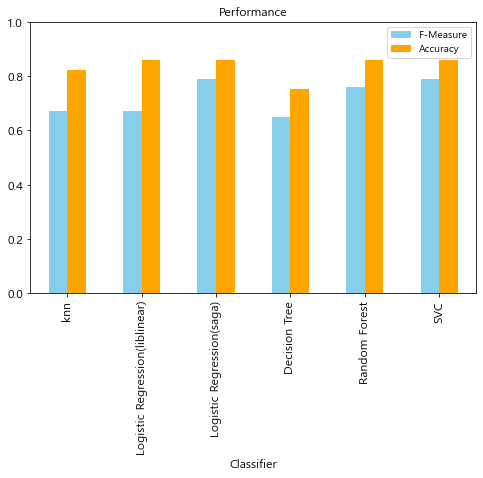

In [153]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar',title = 'Performance',
                                            figsize =(8,5),ylim=[0,1],color = ['skyblue','orange'],
                                             legend = True, fontsize = 12)
ax.set_xlabel('Classifier',fontsize = 12)
plt.show()

In [154]:
mina = [(1, 75, 0, 50, 0, 0, 0, 93.1, 1, 0, 0, 1, 0, 1)]
minha = pd.DataFrame(mina)

In [155]:
minha

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,75,0,50,0,0,0,93.1,1,0,0,1,0,1


In [156]:
minha_std = stdsc.transform(mina)
minha_std

array([[  1.35238581,   0.71251686,  -1.08245885,  -1.50229559,
         -0.80076299,  -9.04027675,  -1.38036423,   1.58545631,
          0.88975652, -10.70108191,  -1.05254128,   1.16732059,
         -1.43924583,   1.62605898]])

In [157]:
pred_rfc2 = rfc2.predict(minha_std)
pred_rfc2

array([0], dtype=int64)

minha 학생은 1[not placed]라는 예측 결과를 도출